**Information:** *Basic concepts and simple examples of linear regression via least squares*

**Written by:** *Zihao Xu*

**Last updated date:** *Oct.15.2021*

# Basic concepts

## Regression
- **Regression** refers to a set of methods for modeling the relationship between one or more independent variables and a dependent variable. 
    - In the natural sciences and social sciences, the purpose of regression is most often to **characterize** the relationship between the inputs and outputs
    - In machine learning, it is most often concerned with **prediction**
- Regression problems pop up whenever a prediction for a **numerical value** is wanted.
    - Predicting prices
    - Predicting length of stay
    - Demand forecasting
    - ...
- Mathematical Representation
    - Given $n$ observations consisting of $$\mathbf{X}_{1:n}=\{\mathbf{x}_1,\mathbf{x}_2,\cdots,\mathbf{x}_n\}$$ which is usually known as *inputs*, *features*, etc. and $$\mathbf{y}_{1:n}=\{y_1,y_2,\cdots,y_n\}$$ which is **continuous** and is usually known as *outputs*, *targets*, etc.
    - The Regression Problem is to use the data to learn the **map** between $\mathbf{x}$ and $y$
- The goal of a regression problem in machine learning is to **predict** a numerical value given some input

## Linear Regression
- May be both the **simplest** and most **popular** among the standard tools to regression
- A kind of traditional **supervised machine learning**
- **Assumptions**:
    - The relationship between the independent variables $\mathbf{x}$ and the dependent variable $y$ is **linear**
        - That is to say, $y$ can be expressed as a **weighted sum** of the elements in $x$
        - Or in other words, *Linear regression* models the output as a line ($\text{dim}(\mathbf{x})=1$) or hyperplane ($\text{dim}(\mathbf{x}>1)$)
    - There exist some noise on the observations and any noise is **well-behaved** (following a Gaussian distribution)
- **Linear Regression Model**:
    - The linear regression model is defined by the coefficients (or **parameters**) for each feature
    - For $\mathbf{x}\in\mathbb{R}^d,\mathbf{x}=[x_1,x_2,\cdots,x_d]^T$, denote the parameters to the $\theta$: $$\hat{y}=f(x)=\theta_0+\theta_1x_1+\theta_2x_2+\cdots+\theta_dx_d$$ Let $\boldsymbol{\theta}=[\theta_0,\theta_1,\theta_2,\cdots,\theta_{d}]^T$ and augmented $\tilde{\mathbf{x}}=[1,x_1,x_2,\cdots,x_d]^T$ The the model can be written as $$\hat{y}=f(x)=\boldsymbol{\theta}^T\tilde{\mathbf{x}}$$
    - This is known as **parametric model**
- **Goal of Linear Regression**:
    - Notice that in **assumption**, we assume that there exist some noises in the observations following a Gaussian distribution. Therefore, we are **not** going to directly solve the equation and expect to get a result $\boldsymbol{\theta}$ that  $$y_i=\boldsymbol{\theta}\tilde{\mathbf{x}}_i\ \text{for}\ 1\le i\le n$$ 
    - Even when we are confident that the underlying relationship is linear, the noise term should be taken into consideration
    - The goal of linear regression is to find the parameters $\boldsymbol{\theta}$ that **minimize the prediction error**

## Loss function
The most *popular* loss function in regression problems is the **squared error**. 

- When the prediction for an example $i$ is $\hat{y}_i$ and the corresponding true label is $y_i$, the squared error is given by $$l_i(\boldsymbol{\theta})=\left(\hat{y}_i-y_i\right)^2=\left(\boldsymbol{\theta}^T\tilde{\mathbf{x}}_i-y_i\right)^2$$
    - Note: In some notations, there is a $\frac{1}{2}$ term for the convenience of notating derivatives, but it makes no difference as optimization
- To measure the quality of a model on the entire dataset of $n$ examples, we simply sum (or **equivalently**, average) the losses on dataset $$L(\boldsymbol{\theta})=\underset{i=1}{\overset{n}{\Sigma}}l_i(\boldsymbol{\theta})=\underset{i=1}{\overset{n}{\Sigma}}\left(\boldsymbol{\theta}^T\tilde{\mathbf{x}}_i-y_i\right)^2$$ In matrix notation: $$L(\boldsymbol{\theta})=\|\mathbf{y}-\tilde{\mathbf{X}}\boldsymbol{\theta}\|^2_2$$ Where $\mathbf{y}=[y_1,y_2,\cdots,y_n]^T\in\mathbb{R}^n,\ \boldsymbol{\theta}=\left[\theta_0,\theta_1,\theta_2,\cdots,\theta_{d}\right]^T\in\mathbb{R}^{d+1},\ \tilde{\mathbf{X}}=\left[\tilde{\mathbf{x}}_1,\cdots,\tilde{\mathbf{x}}_n\right]^T\in\mathbb{R}^{n\times (d+1)},\tilde{\mathbf{x}}=[1,x_1,x_2,\cdots,x_d]^T$
    - When averaging the losses on dataset, it's called **Mean Squared Error**
    - $\tilde{\mathbf{X}}$ is called **Design Matrix**
- Known as **Ordinary Least Squares (OLS)**
        

## Normal Equation: closed-form solution for OLS
Calculate the gradient of OLS
$$
\begin{aligned}
\nabla_{\boldsymbol{\theta}}\|\mathbf{y}-\tilde{\mathbf{X}}\boldsymbol{\theta}\|^2_2
&=\nabla_{\boldsymbol{\theta}}\left[\left(\mathbf{y}-\tilde{\mathbf{X}}\boldsymbol{\theta}\right)^T\left(\mathbf{y}-\tilde{\mathbf{X}}\boldsymbol{\theta}\right)\right]\\
&=\left[2\left(\mathbf{y}-\tilde{\mathbf{X}}\boldsymbol{\theta}\right)^T\cdot\nabla_{\boldsymbol{\theta}}\left[\mathbf{y}-\tilde{\mathbf{X}}\boldsymbol{\theta}\right]\right]^T\\
&=2\left(\mathbf{y}-\tilde{\mathbf{X}}\boldsymbol{\theta}\right)\cdot\left(-\tilde{\mathbf{X}}\right)^T\\
&=2\left(-\tilde{\mathbf{X}}^T\mathbf{y}+\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}\boldsymbol{\theta}\right)
\end{aligned}
$$
Set the gradient to zero *(first-order optimization)* and solve:
$$
\begin{aligned}
2\left(-\tilde{\mathbf{X}}^T\mathbf{y}+\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}\boldsymbol{\theta}^*\right)&=0\\
\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}\boldsymbol{\theta}^*&=\tilde{\mathbf{X}}^T\mathbf{y}\\
\boldsymbol{\theta}^*&=\left(\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}\right)^{-1}\tilde{\mathbf{X}}^T\mathbf{y}
\end{aligned}
$$

- This is known as **normal equation**, finds the regression coefficients **analytically**.
- It's an one-step learning algorithm (as opposed to Gradient Descent)

## Normal Equation vs Gradient Descent
### Gradient Descent
- Needs to choose GD-based algorithms and set appropriate parameters
- Needs to do a lot of iterations
- Works well with large $d$ (dimension of input data)

### Normal Equation
- Gets rid of setting parameters
- Does not need to iterate - compute in one step
- Slow if $d$ is large $(n\le10^4)$
- Needs to compute inverse of $\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}$, which is very slow
    - Sometimes use math tricks like *QR factorization* to speed up computation
- Leads to problems if $\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}$ is not invertible

## Improvements for Normal Equation
### Orthogonalization
To speed up computation of $\left(\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}\right)^{-1}$

- Make the columns of $\tilde{\mathbf{X}}$ orthonormal - orthogonal to each other and of length $1$
- Do the **QR factorization** and obtain matrix $\tilde{\mathbf{X}}=\mathbf{QR}$
- With the property $\mathbf{Q}^T\mathbf{Q}=\mathbf{I}$, the calculation can be simplified a lot: $$\begin{aligned}&\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}=\mathbf{R}^T\mathbf{Q}^T\mathbf{QR}=\mathbf{R}^T\mathbf{R}\\&\Rightarrow\mathbf{R}^T\mathbf{R}\boldsymbol{\theta}^*=\mathbf{R}^T\mathbf{Q}^T\mathbf{y}\\&\Rightarrow\boldsymbol{\theta}^*=\mathbf{R}^{-1}\mathbf{Q}^T\mathbf{y}\end{aligned}$$
- Do not need to invert $\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}$ directly

### Singular Value Decomposition
Apply SVD to $\tilde{\mathbf{X}}$
$$\begin{aligned}\tilde{\mathbf{X}}\boldsymbol{\theta}-\mathbf{y}&=\mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T\boldsymbol{\theta}-\mathbf{y}\\&=\mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T\boldsymbol{\theta}-\mathbf{UU}^T\mathbf{y}\\&=\mathbf{U}\left(\boldsymbol{\Sigma}\mathbf{V}^T\boldsymbol{\theta}-\mathbf{U}^T\mathbf{y}\right)\end{aligned}$$
Denote $\mathbf{v}=\mathbf{V}^T\boldsymbol{\theta}$ and $\mathbf{z}=\mathbf{U}^T\mathbf{y}$
$$\tilde{\mathbf{X}}\boldsymbol{\theta}-\mathbf{y}=\mathbf{U}\left(\boldsymbol{\Sigma}\mathbf{v}-\mathbf{z}\right)$$
Notice that orthogonal matrices preserve the $L^2$ norm
$$\left\|\mathbf{U}\left(\boldsymbol{\Sigma}\mathbf{v}-\mathbf{z}\right)\right\|_2^2=\left\|\boldsymbol{\Sigma}\mathbf{v}-\mathbf{z}\right\|_2^2$$
That is to say
$$\left\|\tilde{\mathbf{X}}\boldsymbol{\theta}-\mathbf{y}\right\|_2^2=\left\|\boldsymbol{\Sigma}\mathbf{v}-\mathbf{z}\right\|_2^2$$
In this way, the OLS regression problem is reduced to a diagonal form. 

To minimize $\left\|\boldsymbol{\Sigma}\mathbf{v}-\mathbf{z}\right\|_2^2$, first denote
$$\text{diag}\left(\boldsymbol{\Sigma}\right)=\left(\sigma_1,\sigma_2,\cdots,\sigma_r,0,\cdots,0\right)$$
(Always remember $\boldsymbol{\Sigma}$ is not necessarily a diagonal square matrix). Then we can get
$$\boldsymbol{\Sigma}\mathbf{v}=\begin{bmatrix}\sigma_1v_1\\ \sigma_2v_2\\ \vdots\\ \sigma_rv_r\\0\\ \vdots\\0\end{bmatrix}\ \ \ \ \boldsymbol{\Sigma}\mathbf{v}-\mathbf{z}=\begin{bmatrix}\sigma_1v_1-z_1\\ \sigma_2v_2-z_2\\ \vdots\\ \sigma_rv_r-z_r \\ -z_{r+1}\\ \vdots\\ -z_m\end{bmatrix}$$
Since we're minimizing w.r.t. $\mathbf{v}$, only first $r$ components of $\boldsymbol{\Sigma}\mathbf{v}-\mathbf{z}$ matter. Therefore, we can make these $\sigma_iv_i-z_i$ as small as possible by using $v_i=\frac{z_i}{\sigma_i}$, which makes the first $r$ components become $0$ and the rest are $-c_i$, thus 
$$\left\|\boldsymbol{\Sigma}\mathbf{v}-\mathbf{z}\right\|^2_2=\underset{i=r+1}{\overset{m}{\Sigma}}c_i^2$$

The compact solution in this way is
$$\boldsymbol{\theta}^*=\tilde{\mathbf{X}}^+\mathbf{y}$$
where $\tilde{\mathbf{X}}^+$ is the **Moore-Penrose Pseudoinverse**

## Basis Function Regression
### Motivation
To adapt linear regression to nonlinear relationships between variables

### Definition
A **generalization of linear regression** that essentially replaces each input with a basis function of the input. 

- A linear basis function model that uses the identity function is just linear regression.
- The model is **linear in the coefficients** of basis functions. The basis functions can be non-linear.

### Mathematical Representation
The form of the basis function regression is
$$
y=f(\mathbf{x})=\underset{i=1}{\overset{m}{\Sigma}}\theta_i\phi_i(\mathbf{x})=\boldsymbol{\theta}^T\boldsymbol{\phi}(\mathbf{x})
$$
where $\boldsymbol{\theta}=\left(\theta_1,\cdots,\theta_m\right)^T$ are coefficients and $\boldsymbol{\phi}=\left(\phi_1,\cdots,\phi_m\right)^T$ are arbitrary basis functions

### Common Basis Function Regression Model
- **Polynomials**
    - In the polynomial model, the basis functions are polynomial functions. For example, take $$\phi_1=1,\phi_2=x,\phi_3=x^2,\cdots$$
- **Multi-dimensional polynomials**
    - $\phi_i(\mathbf{x})=\Sigma_{\alpha\in A_i}\beta_{\alpha}\mathbf{x}^{\alpha}$
- **Radial basis functions**
    - $\phi_i(\mathbf{x})=\text{exp}\left\{-\frac{\left\|\mathbf{x}-x_i\right\|^2}{2l^2}\right\}$
- **Fourier Series**
    - $\phi_{2j}(x)=\text{cos}\left(\frac{2j\pi}{L}x\right)$ and $\phi_{2j+1}(x)=\text{sin}\left(\frac{2j\pi}{L}x\right)$

%%latex
\newpage

# Analytically solve linear regression problems
The general process of analytically solving linear regression problems are 

- Get the dataset
- Select the model to fit the data with (choose basis functions)
- Build the *design matrix* accordingly
- Solve the problem by applying SVD to the design matrix
- Check the regression result on some evaluation data

## Simple linear regression with a single variable
We'll start with pairs of $x$ and $y$ which definitely have a linear relationship while $y$ may be contaminated with Gaussian noise. In particular, we generate the data from
$$y_i=-0.5+2x_i+0.1\epsilon_i$$
where $\epsilon_i\in\mathcal{N}(0,1)$ and we samples $x_i\sim U([0,1])$

First, import necessary modules we would use in such a simple regression problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Ensure reproducibility
np.random.seed(123)

**[``seaborn``](https://seaborn.pydata.org/)** is a Python data visualization library based on **``matplotlib``**. It provides a high-level interface for drawing attractive and informative statistical graphics. Here we simply use it to set the figure styles and line widths.

In [2]:
import seaborn as sns
# Use the default figure style in seaborn
sns.set()
# Set the line width
sns.set_context('paper')

Generate the synthetic dataset and visualize it.

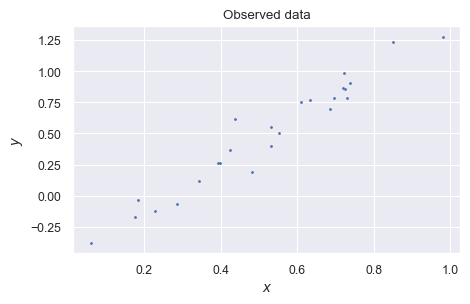

In [3]:
# Number of observations
num_obs = 25
# Sample x
x = np.random.rand(num_obs).reshape(-1, 1)
# True parameters
theta_true = np.array([-0.5, 2.0]).reshape(-1, 1)
# Calculate y samples
y = theta_true[0] + theta_true[1] * x + 0.1 * np.random.randn(num_obs).reshape(
    -1, 1)
# Visulize the dataset
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x, y, '.', markersize=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Observed data')
plt.show()

To use least squares to fit the data into the model
$$y=\theta_0+\theta_1 x$$
First build the $N\times 2$ design matrix $\tilde{\mathbf{X}}$
$$\begin{bmatrix}1&x_1\\1&x_2\\ \vdots&\vdots\\1&x_N\end{bmatrix}$$

In [4]:
X = np.hstack([np.ones((num_obs, 1)), x])
print(X[0, :])

[1.         0.69646919]


To get the analytic solution by the means of singular value decomposition mentioned above, call the **[``numpy.linalg.lstsq()``](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)** method

In [5]:
# We only cares the solutions
theta = np.linalg.lstsq(X, y, rcond=None)[0]
print('The estimated theta0 is: %1.3f' % theta[0])
print('The estimated theta1 is: %1.3f' % theta[1])

The estimated theta0 is: -0.487
The estimated theta1 is: 1.872


Considering that the true values are $\theta_0=-0.5,\theta_1=2$, the values we found are very close to the correct values, but not exactly the same. This is good enough for such a small dataset containing only $25$ samples with noises. In general, the more noise there is, the more observations it would take to identify the regression coefficients correctly.

Now visualize the regression function.

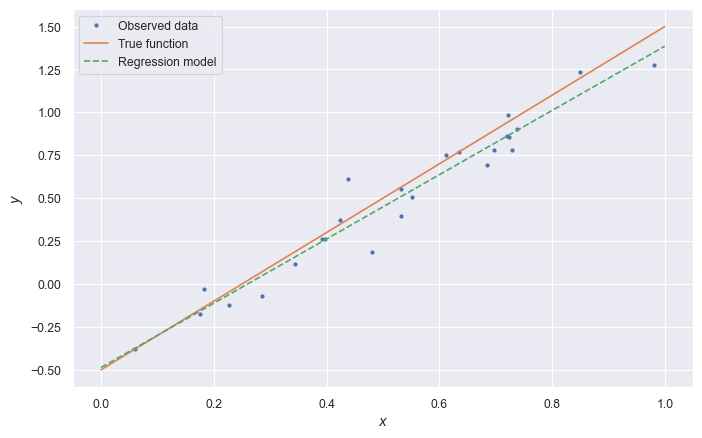

In [6]:
# Some points on which to evaluate the regression function
xe = np.linspace(0, 1, 100)
# True function
ye_true = theta_true[0] + theta_true[1] * xe
# The regression model
ye = theta[0] + theta[1] * xe
# Visulization
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
ax.plot(x, y, '.', markersize=4, label='Observed data')
ax.plot(xe, ye_true, label='True function')
ax.plot(xe, ye, '--', label='Regression model')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')
plt.show()

## Polynomial Regression with a single variable
Try to fit a linear regression model to the data generated from
$$y_i=-0.5+2x_i+2x_i^2+0.1\epsilon_i$$
where $\epsilon_i\sim\mathcal{N}(0,1)$ and we sample $x_i\sim U([-1,1])$

First generate the dataset and visualize it

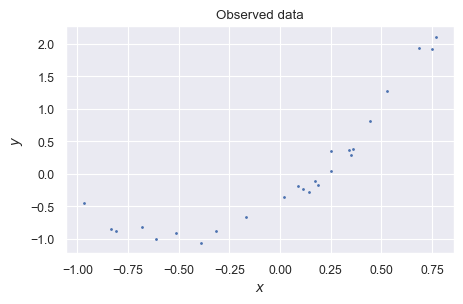

In [7]:
# Number of observations
num_obs = 25
# Sample x
x = (2 * np.random.rand(num_obs) - 1.0).reshape(-1, 1)
# True parameters
theta_true = np.array([-0.5, 2.0, 2.0]).reshape(-1, 1)
# Calculate y samples
y = theta_true[0] + theta_true[1] * x + theta_true[2] * x**2 \
+ 0.1*np.random.randn(num_obs).reshape(-1, 1)
# Visulize the dataset
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x, y, '.', markersize=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Observed data')
plt.show()

To use least squares to fit the data into the model
$$y=\theta_0+\theta_1 x+\theta_2 x^2$$
First build the $N\times 3$ design matrix $\tilde{\mathbf{X}}$
$$\begin{bmatrix}1&x_1&x_1^2\\1&x_2&x_2^2\\ \vdots&\vdots&\vdots\\1&x_N&x_N^2\end{bmatrix}$$

In [8]:
X = np.hstack([np.ones((num_obs, 1)), x, x**2])
print(X[0, :])

[1.         0.09013601 0.0081245 ]


Then solve this regression problem with the same method

In [9]:
theta = np.linalg.lstsq(X, y, rcond=None)[0]
print('The estimated theta0 is: %1.3f' % theta[0])
print('The estimated theta1 is: %1.3f' % theta[1])
print('The estimated theta2 is: %1.3f' % theta[2])

The estimated theta0 is: -0.482
The estimated theta1 is: 1.944
The estimated theta2 is: 1.930


Check the performance on some evaluation points

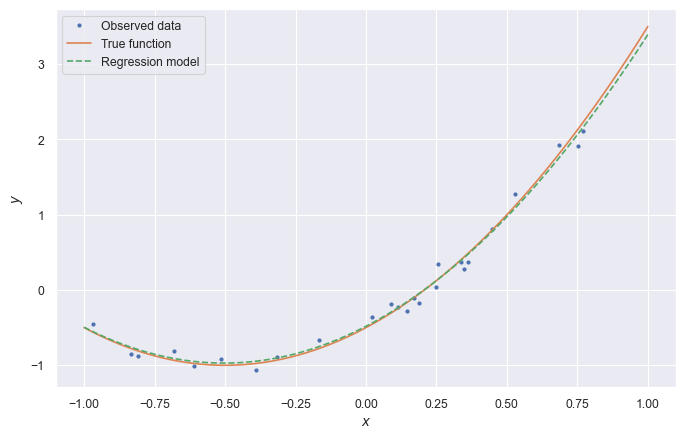

In [10]:
# Some points on which to evaluate the regression function
xe = np.linspace(-1, 1, 100)
# True function
ye_true = theta_true[0] + theta_true[1] * xe + theta_true[2] * xe**2
# The regression model
ye = theta[0] + theta[1] * xe + theta[2] * xe**2
# Visulization
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
ax.plot(x, y, '.', markersize=4, label='Observed data')
ax.plot(xe, ye_true, label='True function')
ax.plot(xe, ye, '--', label='Regression model')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')
plt.show()

## Linear regression with Fourier basis
Try to fit the data generated from 
$$
y_i=-0.5+2x_i+2x_i^2+sin(x_i)-sin(2x_i)+\epsilon_i
$$
where $\epsilon_i\sim\mathcal{N}(0,1)$ and we sample $x_i\sim U([-5,5])$

First generate the dataset and visualize it.

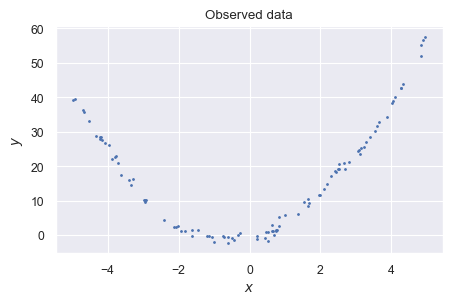

In [11]:
# Number of observations
num_obs = 100
# Sample x
x = (10 * np.random.rand(num_obs) - 5.0).reshape(-1, 1)
# True parameters
theta_true = np.array([-0.5, 2.0, 2.0, 1, -1]).reshape(-1, 1)
# Calculate y samples
y = theta_true[0] + theta_true[1] * x + theta_true[2] * x**2 \
+ theta_true[3]*np.sin(x) + theta_true[4]*np.sin(2*x)\
+ np.random.randn(num_obs).reshape(-1, 1)
# Visulize the dataset
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x, y, '.', markersize=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Observed data')
plt.show()

Next step is to build the design matrix for Fourier basis
$$\phi_{2j}(x) = \cos\left(\frac{2j\pi}{L}x\right),\phi_{2j+1}(x) = \sin\left(\frac{2j\pi}{L}x\right)$$
for $j=1,\dots,m/2$

Here we choose $m=4$ arbitrarily (how to select $m$ would be introduced later)

In [12]:
# Define the function since we need to call this repeatedly
def get_fourier_design_matrix(input_x, length, num_terms):
    cols = [np.ones((input_x.shape[0], 1))]
    for ii in range(int(num_terms / 2)):
        cols.append(np.cos(2 * (ii + 1) * np.pi / length * input_x))
        cols.append(np.sin(2 * (ii + 1) * np.pi / length * input_x))
    return np.hstack(cols)


# Length of domain
L = 10
m = 6
Phi = get_fourier_design_matrix(x, L, m)

Visualize the Fourier basis

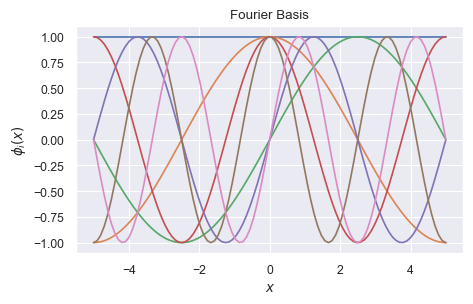

In [13]:
xe = np.linspace(-5, 5, 100).reshape(-1, 1)
Phi_xe = get_fourier_design_matrix(xe, L, m)
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(xe, Phi_xe)
ax.set_xlabel('$x$')
ax.set_ylabel('$\phi_i(x)$')
ax.set_title('Fourier Basis')
plt.show()

Again, solve the problem with the same method

In [14]:
theta = np.linalg.lstsq(Phi, y, rcond=None)[0]

Check the performance on some evaluation points

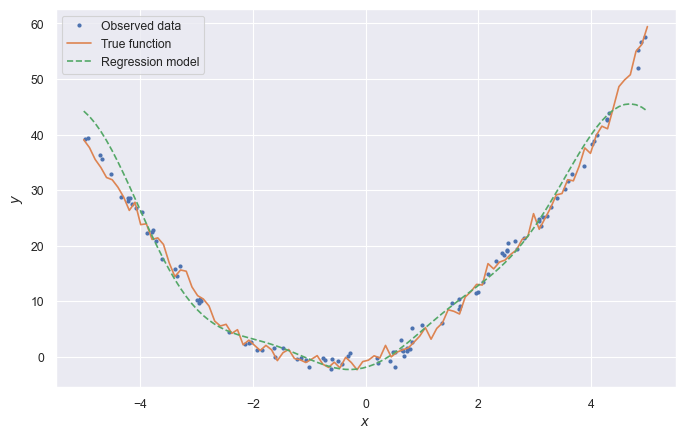

In [15]:
# True function
ye_true = theta_true[0] + theta_true[1] * xe + theta_true[2] * xe**2 \
+ theta_true[3]*np.sin(xe) + theta_true[4]*np.sin(2*xe)\
+ np.random.randn(num_obs).reshape(-1, 1)
# Regression result
ye = np.dot(Phi_xe, theta)
# Visulization
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
ax.plot(x, y, '.', markersize=4, label='Observed data')
ax.plot(xe, ye_true, label='True function')
ax.plot(xe, ye, '--', label='Regression model')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')
plt.show()

## Make use of Scikit-Learn package
While the process of solving linear regression problems are similar, the **[``Scikit-Learn``](https://scikit-learn.org/stable/index.html)** package provides several encapsulated method which can analytically solve linear regression models in several lines.

- **``linear_model``** module implements a variety of linear models 
- **``preprocessing``** modules provides a simple way to build design matrices for different basis functions
- **``pipeline``** module implements utilities to build a composite estimator, as a chain of transforms and estimators 

Here is a simple example of using the package to solve a simple regression problems with polynomial features. The dataset to be fit is a noisy version of a sin wave 
$$
y_i=\text{sin}(x_i)+0.1*\epsilon
$$
where $\epsilon_i\sim\mathcal{N}(0,1)$ and we sample $x_i\sim U([0,4\pi])$

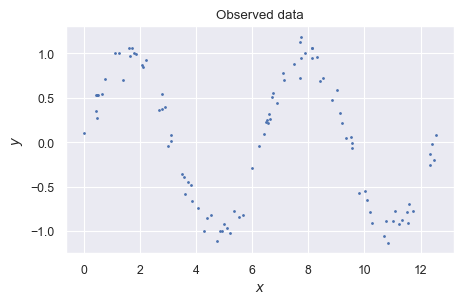

In [16]:
# Number of observations
num_obs = 100
# Sample x
x = 4 * np.pi * np.random.rand(num_obs).reshape(-1, 1)
# Calculate y samples
y = np.sin(x) + 0.1 * np.random.randn(num_obs).reshape(-1, 1)
# Visulize the dataset
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x, y, '.', markersize=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Observed data')
plt.show()

Solve the problem with Scikit-Learn package

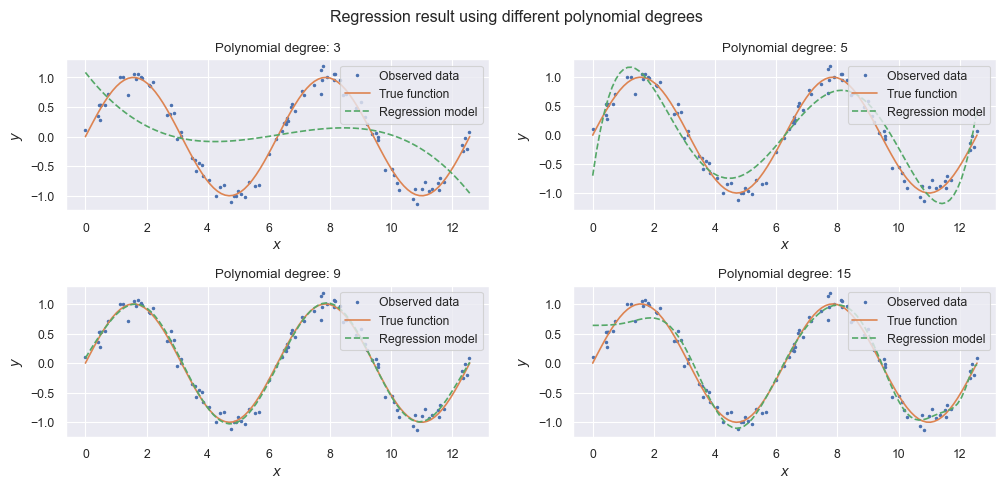

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Try with different degrees easily
degrees = np.array([3, 5, 9, 15])
# Some evaluation points
xe = np.linspace(0, 4 * np.pi, 100).reshape(-1, 1)
# True value at the evaluation points
ye_true = np.sin(xe)
fig, axes = plt.subplots(2, 2, figsize=(12, 5), dpi=100)
axes = axes.flatten()
for index, degree in enumerate(degrees):
    # Assign the regression model and preprocessing method
    estimator = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Fit with the created model
    estimator.fit(x, y)
    # See the performance on evaluation points
    ye = estimator.predict(xe)
    # Visualization
    ax = axes[index]
    ax.plot(x, y, '.', markersize=3, label='Observed data')
    ax.plot(xe, ye_true, label='True function')
    ax.plot(xe, ye, '--', label='Regression model')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('Polynomial degree: %d' % degree)
    ax.legend(loc='upper right')
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Regression result using different polynomial degrees')
plt.show()

%%latex
\newpage

# Solve linear regression problems by GD via PyTorch

Usually, while the analytic solution is easy to calculate on small datasets and simple linear regression models, we will need to apply gradient descent to find the minimum when the dataset is too large, which leads to huge amount of matrix computations in analytic solutions.

Here shows the standard way to implement linear regression via PyTorch, ranging from data preprocessing, building the model, defining loss functions and applying the minibatch gradient descent optimizer.

## Dataset
In general, the first step to solving a learning problem is to get the dataset and find out how the data we're intereseted in can be accessed. In this case, we'll build a synthetic dataset simply consists of *design matrices* as features and the value of $y$ as lables.

Try to fit a linear regression model to the data generated from
$$y_i=-5.5+2.4x_{i,1}+3.8x_{i,2}+0.1\epsilon_i$$
where $\epsilon_i\sim\mathcal{N}(0,1)$ and we sample $x_1\sim U([-5,5]),x_2\sim U([0,10])$

Write the problem in matrix form
$$\mathbf{y}=\tilde{\mathbf{X}}\boldsymbol{\theta}+0.1\boldsymbol{\epsilon}$$
where 
$$\tilde{\mathbf{X}}=\begin{bmatrix}1&x_{1,1}&x_{1,2}\\1&x_{2,1}&x_{2,2}\\ \vdots&\vdots&\vdots\\ 1&x_{N,1}&x_{N,2}\end{bmatrix},\mathbf{y}=\begin{bmatrix}y_1\\y_2\\ \vdots\\y_N\end{bmatrix},\boldsymbol{\theta}_{gt}=\begin{bmatrix}-5.5\\2.4\\3.8\end{bmatrix}$$

First generate the synthetic dataset.

In [18]:
import torch
# Ensure reproducibility (for CPUs only)
torch.manual_seed(123)


# Function to generate the dataset
def get_dataset(theta_gt, number_obs):
    """
    Generate the dataset with given parameters and number of observations
    """
    # Generate each column seperately
    x0 = torch.ones((number_obs,1))
    x1 = 5.0 * torch.rand((number_obs,1)) - 5.0
    x2 = 10.0 * torch.rand((number_obs,1))
    # Concatenate the columns to get X
    features = torch.cat((x0,x1,x2),dim=1)
    # Calculate y
    labels = torch.matmul(features,theta_gt).reshape(-1,1) + 0.1*torch.randn((number_obs,1))
    return features,labels


# Number of observations
num_obs = 1000
# True parameters
theta_true = torch.tensor([-5.5,2.4,3.8]).reshape(-1,1)
# Get the dataset
X,y = get_dataset(theta_true,num_obs)
# Sanity check
print('Features:\t',X[0,:].numpy())
print('Label:\t\t',y[0].numpy())

Features:	 [ 1.        -3.5194402  4.848646 ]
Label:		 [4.7357345]


Visualize the distribution of $x_1$ and $x_2$

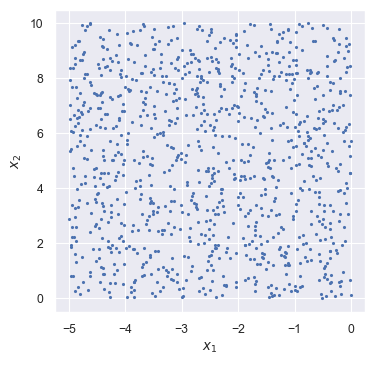

In [19]:
fig, ax = plt.subplots(figsize=(4,4),dpi=100)
ax.plot(X[:,1].numpy(),X[:,2].numpy(),'.',markersize=2.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.show()

## Naive implementation
Here the naive implementation gives the simplest process without some highly-encapsulated methods for gradient descent in PyTorch to show the concept and general building process of dataloader, loss function and optimizer better. This maybe possible for further customization of our own models required in various researches.

### Dataloader
To apply minibatch SGD optimization, we would make multiple passes over the dataset, grab one minibatch of examples at a time and use them to update the model. Here is one simple implementation of that functionality, which is usually called **dataloader**

Consider the additional variance due to sampling with replacement mentioned in ***04 Numerical Optimization***, we're always implementing sampling without replacement. The **``yield()``** method is quite useful in this situation.

In [20]:
# Use the functionality in random for stochastic sampling
import random
# Also, ensure reproducibility
random.seed(123)


def dataloader(features, labels, batch_size):
    """
    Grab a minibatch from the given dataset
    """
    # Get the number of observations
    number_obs = labels.shape[0]
    # Create a randomized list for indices
    # This enables the idea of 'stochastic sampling'
    indices = list(range(number_obs))
    random.shuffle(indices)
    # According to the randomized list, grab the batch one by one
    for ii in range(0, number_obs, batch_size):
        # Watch out indices in the end
        batch_indices = torch.tensor(indices[ii:min(ii+batch_size,number_obs)])
        yield features[batch_indices], labels[batch_indices]


# Sanity check
batchsize = 10
for X_batch,y_batch in dataloader(X,y,batchsize):
    print(X_batch)
    print(y_batch)
    break

tensor([[ 1.0000, -0.3223,  1.9832],
        [ 1.0000, -1.6694,  7.6284],
        [ 1.0000, -1.6956,  6.2151],
        [ 1.0000, -0.5691,  3.6827],
        [ 1.0000, -2.4481,  2.2968],
        [ 1.0000, -4.6747,  9.8961],
        [ 1.0000, -3.2238,  4.6473],
        [ 1.0000, -4.8389,  0.3819],
        [ 1.0000, -4.3865,  5.3667],
        [ 1.0000, -3.1407,  7.7926]])
tensor([[  1.2578],
        [ 19.6397],
        [ 13.9758],
        [  7.0258],
        [ -2.8122],
        [ 20.9997],
        [  4.3878],
        [-15.5836],
        [  4.2049],
        [ 16.5095]])


This dataloader provides distinct minibatches successively until the entire dataset has been exhausted, which is good enough for showing the purpose of a dataloader. However, it cannot be directly used in complex real problems. For example, it requires to load all the data in memory and we perform lots of random memory access. In PyTorch, there are many more efficient dataloader for real problems.

### Define the model
A necessary step is to define the model, which relates its inputs and parameters to its outputs. In this problem, the model is quite simple.

In [21]:
def LinReg(features,parameters):
    """
    The linear regression model
    """
    return torch.matmul(features, parameters)

### Initialize model parameters
Before optimizing the model's parameters by some gradient descent methods, we need to have some parameters. There can be many different ways to initialize the parameters and in some complicated models, the parameters are static attributes of the model class. In this simple problem, we simply initialize the parameters out of the model by sampling random numbers from a normal distribution.

In [22]:
theta = torch.normal(0,0.01,size=(3,1),requires_grad=True)

### Loss function
A gradient descent algorithm is based on a loss function. Defining the loss function is necessary. In linear regression problems, the squared loss function is used.

In [23]:
def squared_loss(y_pred,y_gt):
    """
    Calculate the loss function between model prediction and the ground truth
    """
    return (y_pred-y_gt)**2

### Optimization Algorithm
The optimization algorithm determines how the parameters are changed according to the loss. Here we select the minibatch SGD, which is widely used in various learning problems.

In [24]:
def SGD(parameters, learning_rate, batch_size):
    """
    Minibatch stochastic gradient descent
    """
    # Update the parameters according to its gradient
    # In this mode, we should not change the gradient any more
    with torch.no_grad():
        parameters -= lr * parameters.grad / batch_size

### Training
Generally the training process is

- Initialize parameters
- Repeat until done
    - Compute gradients
    - Update parameters

In each *epoch*, we will  iterate through the entire dataset once passing through every observation in the training dataset. The **number of epochs** and **learning rate** are both **hyper parameters**.

In [25]:
# Learning rate
lr = 0.003
# Number of epochs
num_epochs = 50
# Initilization parameters
theta = torch.normal(0,0.01,size=(3,1),requires_grad=True)
# Training in loop
for epoch in range(num_epochs):
    # Recall the method to grab a minibatch from dataloader
    for X_batch, y_batch in dataloader(X,y,batchsize):
        # Initialize the gradient
        if theta.grad is not None:
            theta.grad.zero_()
        # Calculate the minibatch loss
        l = squared_loss(LinReg(X_batch,theta),y_batch).sum()
        l.backward()
        SGD(theta, lr, batchsize)
    # Print out the loss after each epoch
    with torch.no_grad():
        if (epoch+1)%10 == 0:
            train_loss = squared_loss(LinReg(X,theta),y)
            print('Epoch: %d, Loss:%1.6f'%((epoch+1),train_loss.mean()))

Epoch: 10, Loss:0.747393
Epoch: 20, Loss:0.143812
Epoch: 30, Loss:0.035541
Epoch: 40, Loss:0.015358
Epoch: 50, Loss:0.011746


### Test
Usually, we need to test the performance of such a regression model with some additional operations. Here we simply compare the estimations of parameters with the ground truth.

In [26]:
print('The estimated parameters are:\t\t',theta.detach().numpy().reshape(1,-1))
print('The ground truth of parameters are :\t',theta_true.numpy().reshape(1,-1))

The estimated parameters are:		 [[-5.4390597  2.4100132  3.7932909]]
The ground truth of parameters are :	 [[-5.5  2.4  3.8]]


## Concise implementation

In this concise implementation using PyTorch modules, we'll still use the dataset created before.

In [27]:
# Sanity check
print('Features:\t',X[0,:].numpy())
print('Label:\t\t',y[0].numpy())

Features:	 [ 1.        -3.5194402  4.848646 ]
Label:		 [4.7357345]


### Dataloader
PyTorch provides the **[``DataLoader``](https://pytorch.org/docs/stable/data.html)** class for grabbing a minibatch stochastically from the dataset. Usually, we should send a dataset in **``Dataset``** class, which is a specially defined class in PyTorch.

In this case, we can call the **``TensorDataset()``** method to zip the tensors into a dataset.

In [28]:
import torch.utils.data as tud

# Notice the * operation
dataset = tud.TensorDataset(*(X,y))
print(dataset[0])
# Build the dataloader
batchsize = 10
# Set shuffle = True to have the data reshuffled at each epoch
dataloader = tud.DataLoader(dataset, batchsize, shuffle=True)
# Sanity check
next(iter(dataloader))

(tensor([ 1.0000, -3.5194,  4.8486]), tensor([4.7357]))


[tensor([[ 1.0000, -4.0479,  7.0578],
         [ 1.0000, -2.4708,  8.6281],
         [ 1.0000, -0.5242,  0.1577],
         [ 1.0000, -4.6217,  2.3958],
         [ 1.0000, -2.8899,  3.0593],
         [ 1.0000, -1.0640,  3.8317],
         [ 1.0000, -0.6247,  4.3043],
         [ 1.0000, -1.6257,  8.0083],
         [ 1.0000, -4.8406,  9.3560],
         [ 1.0000, -4.0119,  7.6817]]),
 tensor([[11.6408],
         [21.3240],
         [-6.1712],
         [-7.3709],
         [-0.9976],
         [ 6.4418],
         [ 9.5212],
         [20.9894],
         [18.3809],
         [14.1762]])]

### Define the model
First, we can think of the linear regression model as a neural network, where the inputs are $x_1,x_2,\cdots,x_d$ and the only output is $y$. Take the image from the online book *Dive into deep learning* as a clear explanation.

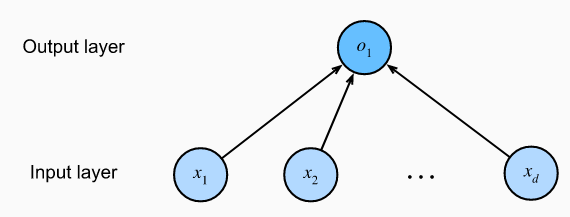

In [29]:
from PIL import Image

img = Image.open("./Figures/LinReg_as_single_layer_NN.png")
img

In linear regression, it's easy to notice that *every* output is connected to *every* input, this transformation is called a **fully-connected layer**. We're able to use a fully-connected layer defined in PyTorch to represent a Linear Regression.

Also, notice that usually we do not consider the $x_0=1$ term as part of the input data. It tends to call the coefficients of $x_1,x_2,\cdots,x_d$ **weights** and explicitly add a **bias term** denoted as $\mathbf{b}$
$$\mathbf{y}=\mathbf{Xw}+\mathbf{b}$$
Therefore, in this case where we view the $x_0=1$ term as a part of the input (design matrix), we need to turn off the bias term manually.

In [30]:
LinReg = torch.nn.Linear(3,1,bias=False)
LinReg

Linear(in_features=3, out_features=1, bias=False)

### Initialize Model Parameters
PyTorch has a predefined way to initialize the parameters. Here we simply specify that each parameter should be randomly sampled from a normal distribution.

The parameters can be accessed by the **``weight``** and **``bias``** attribute.

In [31]:
# View the weights
print(LinReg.weight)

Parameter containing:
tensor([[-0.0620, -0.0908, -0.0227]], requires_grad=True)


In [32]:
# View the bias
print(LinReg.bias)

None


In [33]:
# Initialize the parameters
LinReg.weight.data.normal_(0,0.01)

tensor([[-0.0018,  0.0040,  0.0216]])

In [34]:
# View the weight again
print(LinReg.weight)

Parameter containing:
tensor([[-0.0018,  0.0040,  0.0216]], requires_grad=True)


### Defining the Loss Function
The **[``MSELoss``](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)** class in PyTorch computes the **mean squared error**

In [35]:
loss = torch.nn.MSELoss()

### Optimization Algorithm
Minibatch stochastic gradient descent is a standard toll for optimizing neural networks and thus PyTorch supports it alongside a number of variations on this algorithm in the **[``optim``](https://pytorch.org/docs/stable/optim.html)** module.

When we create an SGD instance, the parameters to optimize over will be obtained from the model (via the **``parameters()``** attribute) and be specified with a dictionary of hyper-parameters required by the optimization algorithm.

For a simple minibatch SGD, it only requires the learning rate.

In [36]:
optimizer = torch.optim.SGD(LinReg.parameters(), lr = 0.003)

### Training
Repeat until converged:

- Zero the gradients by calling **``optimizer.zero_grad()``**
- Generate predictions by calling **``model(input)``**
- Calculate the loss by calling **``loss(prediction, ground truth)``**
- Run the backpropagation by calling **``loss.backward()``**
- Update the model parameters by calling **``optimizer.step()``**

In [37]:
# Number of epochs
num_epochs = 50
# Training in loop
for epoch in range(num_epochs):
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()
        y_pred = LinReg(X_batch)
        l = loss(y_pred,y_batch)
        l.backward()
        optimizer.step()
    if (epoch+1)%10 == 0:
        l = loss(LinReg(X),y)
        print('Epoch: %d, Loss:%1.6f'%((epoch+1),l))

Epoch: 10, Loss:0.746435
Epoch: 20, Loss:0.144383
Epoch: 30, Loss:0.035008
Epoch: 40, Loss:0.015310
Epoch: 50, Loss:0.011755


### Test
Similarly, we only make a simple test to compare the estimations and ground truth.

In [38]:
theta = LinReg.weight.data
print('The estimated parameters are:\t\t',theta.detach().numpy().reshape(1,-1))
print('The ground truth of parameters are :\t',theta_true.numpy().reshape(1,-1))

The estimated parameters are:		 [[-5.4393196  2.4107387  3.7934823]]
The ground truth of parameters are :	 [[-5.5  2.4  3.8]]
